## Programming Assignment #5

**Visualization**

100 points possible.

This assignment asks you to create different visualizations.

##The Setting -- Visualize Your Own Adventure

Identify a data set (or data sets) that interests you and follow the instructions below to create specific types of visualizations. It is OK if this data set overlaps other assignments. Do not use examples from the book. You may use matplotlib or Seaborn.



# Part 0 -- Submission Details


(10 points) Please enter your name and the date below. Submit your answers as a completed notebook by the deadline posted on Canvas.  Late submissions will not get credit for this section.

Name: Duong Hoang

Date: 11/07/2022


# Part 1 -- Load Data Set

(5 points) Load a data set of your choosing into an appropriate data structure. Leave a comment describing what your data set is and why it interests you.

In [34]:
# insert code here
import pandas as pd
import matplotlib.pyplot as plt

# dataset was found here: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

# this data set consists of the marks secured by the students in various 
# subjects (math, reading, writing) considering other factors 
# (gender, race, parental education level, lunch, and test prep). 
# read exams data set
exam_data = pd.read_csv('exams.csv')

# I am interested in this data set because as a fellow student who enjoy 
# solving math problems but do not fond of reading, I want to see the trend of 
# how well people with certain backgrounds and habits do in math and reading exams.

# Part 2 -- Line Plot

(15 points) Create a line plot using your data.  Please give your visualization a title, appropripate X and Y axis labels, and a legend.

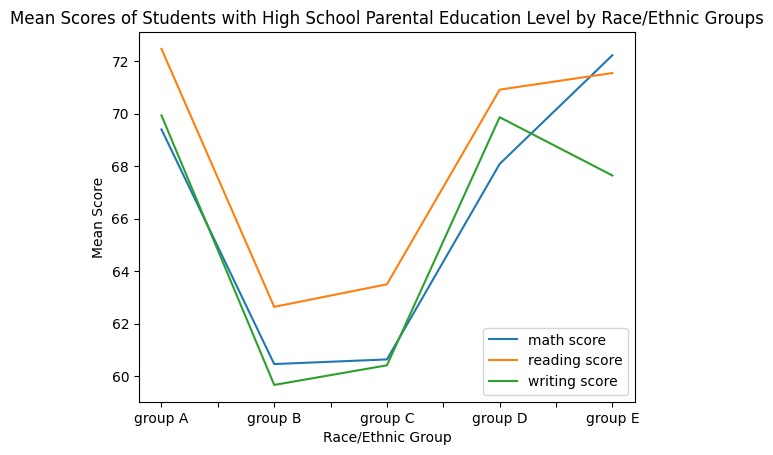

In [35]:
# insert code here

# get current axis to plot multiple plots on the same figure
line_axis = plt.gca() 
# create line plot for math, reading, and writing scores of students 
# whose parental education level is high school, based on race groups (A - E)
highschool_parents = exam_data[exam_data['parental level of education'] == 'high school']
highschool_parents.groupby(['race/ethnicity'])['math score'].mean().plot(kind='line', ax=line_axis)
highschool_parents.groupby(['race/ethnicity'])['reading score'].mean().plot(kind='line', ax=line_axis)
highschool_parents.groupby(['race/ethnicity'])['writing score'].mean().plot(kind='line', ax=line_axis)
# add legend, title, and axis labels
plt.legend()
plt.title(label='Mean Scores of Students with High School Parental Education Level by Race/Ethnic Groups')
plt.xlabel(xlabel='Race/Ethnic Group')
plt.ylabel(ylabel='Mean Score')
plt.show()

# Part 3 -- Scatter Plot

(15 points) Create a scatter plot using your data. Please give your visualization a title, appropripate X and Y axis labels, and a legend.

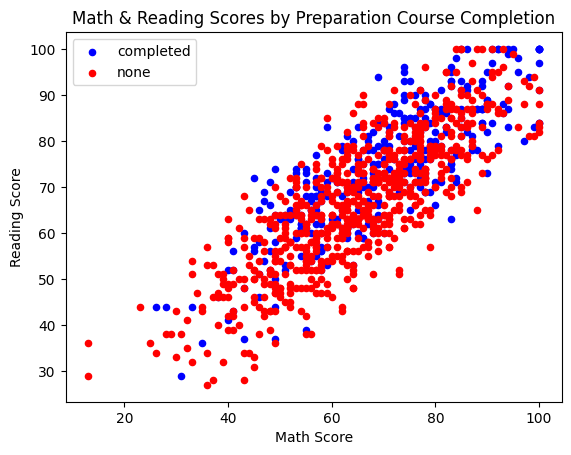

In [36]:
# insert code here

# get current axis to plot multiple plots on the same figure
scatter_axis = plt.gca()
# assign color map for each key based on test preparation course completion, 
# with incompleted/none in red, completed in blue
colors = {'none': 'red', 'completed': 'blue'}
# group data by test preparation course completion then draw scatter plot of 
# math and reading score distributions
grouped = exam_data.groupby('test preparation course')
for key, group in grouped:
    group.plot(ax=scatter_axis, kind='scatter', x='math score', y='reading score', label=key, color=colors[key])
# add plot legend, title, and axis labels
plt.legend()
plt.title(label='Math & Reading Scores by Preparation Course Completion')
plt.xlabel(xlabel='Math Score')
plt.ylabel(ylabel='Reading Score')
plt.show()

# Part 4 -- Histogram

(15 points) Create a histogram using your data. Please give your visualization a title and appropripate X and Y axis labels.  Leave as a comment how you decided the appropriate number of bins used for creating your histogram.

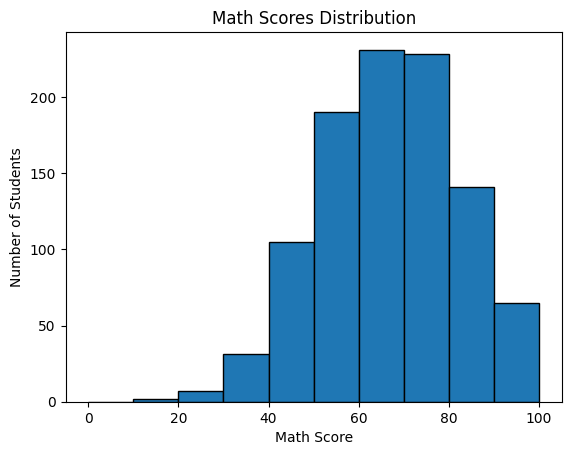

In [37]:
# insert code here

# create histogram plot for math scores with 10 bins with range of length 10, 
# from 0 to 100 (the possible score range) as this will help visualize 
# the letter grade distribution easier
plt.hist(x=exam_data['math score'], bins=range(0, 101, 10), edgecolor='black')
# add plot title and axis labels
plt.title(label='Math Scores Distribution')
plt.xlabel(xlabel='Math Score')
plt.ylabel(ylabel='Number of Students')
plt.show()

# Part 5 -- Other Visualization

(15 points) Create a visualization that interests you; please select something other than line plots, scatter plots, and histograms.  Use this space to get class credit for exploring something you find useful.  Please give your visualization appropriate titles, X and Y axis labels, and a legend (if applicable).

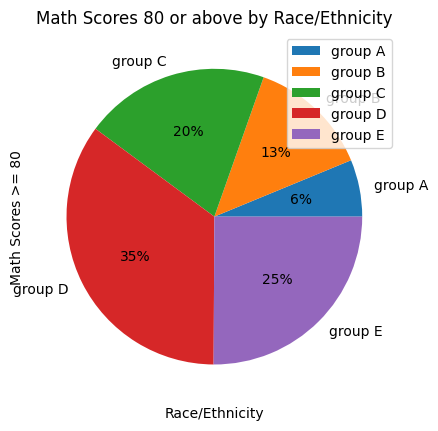

In [38]:
# insert code here

# extract students with math score greater or equal 80
math_80_or_above = exam_data[exam_data['math score'] >= 80]
# draw pie plot visualiza the percentage that each race group accounts for in
# the total count of math scores greater than or equal to 80
math_80_or_above.groupby(['race/ethnicity']).sum().plot(kind='pie', 
                        y='math score', autopct='%1.0f%%')
# add legend, title, and axis labels
plt.legend()
plt.title(label='Math Scores 80 or above by Race/Ethnicity')
plt.xlabel(xlabel='Race/Ethnicity')
plt.ylabel(ylabel='Math Scores >= 80')
plt.show()

# Part 6 -- Subplots

(15 points) Create a plot containing at least two subplots.  You may reuse code from above or create new visualizations.

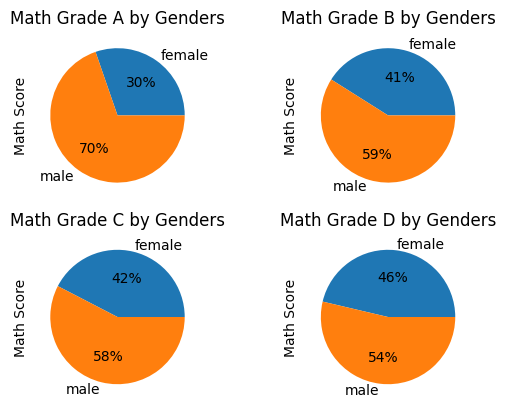

In [39]:
# insert code here

# extract math scores based on letter grades (A - D)
grade_A = exam_data[exam_data['math score'] >= 90]
grade_B = exam_data[exam_data['math score'].between(80, 89)]
grade_C = exam_data[exam_data['math score'].between(70, 79)]
grade_D = exam_data[exam_data['math score'].between(60, 69)]

# define subplot layout with 2 rows, 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2)
# for each quarter, draw a pie chart using each of the math letter grade dataframe
# each pie chart visualiza the percentage that each gender accounts for in 
# the total count of math scores of that corresponding letter grade 
# since in the pie chart, the elements' name are already display next to 
# their slices, no separate legend for each chart is needed
grade_A.groupby(['gender']).sum().plot(kind='pie', y='math score', 
        autopct='%1.0f%%', ax=axes[0,0], title='Math Grade A by Genders', 
        xlabel='Gender', ylabel='Math Score', legend=None)
grade_B.groupby(['gender']).sum().plot(kind='pie', y='math score', 
        autopct='%1.0f%%', ax=axes[0,1], title='Math Grade B by Genders', 
        xlabel='Gender', ylabel='Math Score', legend=None)
grade_C.groupby(['gender']).sum().plot(kind='pie', y='math score', 
        autopct='%1.0f%%', ax=axes[1,0], title='Math Grade C by Genders', 
        xlabel='Gender', ylabel='Math Score', legend=None)
grade_D.groupby(['gender']).sum().plot(kind='pie', y='math score', 
        autopct='%1.0f%%', ax=axes[1,1], title='Math Grade D by Genders', 
        xlabel='Gender', ylabel='Math Score', legend=None)
plt.show()


# Part 7 -- Documentation and Correctness
(10 points) Please document your code with human-readable messages explaining what the code is doing; at a minimum, every function and control structure should be documented.  If your response is a 1-liner, explain how it works.

Additionally, please error check your code; partial credit will be given to answers that do not fully address the requirements. For example, if it says write a function, please make sure your code provides a function.

Please make sure your submission has everything completed.

**Data access for testing**:  Test data is likely needed to run, test, and grade your code. If your code uses publicly available URLs, you do not need to submit data.  If your data is not available online as a URL, please submit data with your Canvas submission.  If your test data is large (over the Canvas submission size), please only submit a sample. If your data is not distributable due to licensing or regulatory concerns, please submit artificial test data. Zip files are perfectly acceptable responses.